In [1]:
## Cleaning the Toyota DataSet

# Toyota Dataset

## Import packages

In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

## Import dataset

In [6]:
income_data=pd.read_csv("C:/Users/HP/Desktop/DataScience/Data/1.04. Real-life example.csv")
data=income_data.copy()

## Identifying missing values 
### To check missing values , we use isna() or isnull()

In [12]:
print(f" Missing rows : \n {data.isna().sum()}")




 Missing rows : 
 Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


### We need to find out more information about missing values to decide how to deal with it 

In [8]:
missing=data[data.isnull().any(axis=1)]
missing

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
17,Mercedes-Benz,NaN,van,240,2.2,Diesel,yes,2007,Vito
29,Mercedes-Benz,NaN,crossover,0,4.6,Petrol,yes,2016,GLS 500
39,Audi,2500.0,sedan,180,NaN,Petrol,no,2000,A4
50,Mercedes-Benz,NaN,sedan,145,3.2,Diesel,yes,2007,E-Class
55,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GLS 350
...,...,...,...,...,...,...,...,...,...
4254,BMW,3500.0,sedan,280,NaN,Petrol,no,1996,730
4260,BMW,NaN,crossover,0,3.0,Diesel,yes,2015,X6
4273,Volkswagen,NaN,other,197,2.0,Diesel,no,2011,T5 (Transporter)
4305,BMW,NaN,crossover,1,3.0,Diesel,yes,2014,X6


In [13]:
print(f"Shape of total data : \n \n {data.shape} \n \n Shape of missing data \n {missing.shape} ")

Shape of total data : 
 
 (4345, 9) 
 
 Shape of missing data 
 (320, 9) 


### Lets visualize the missing values 

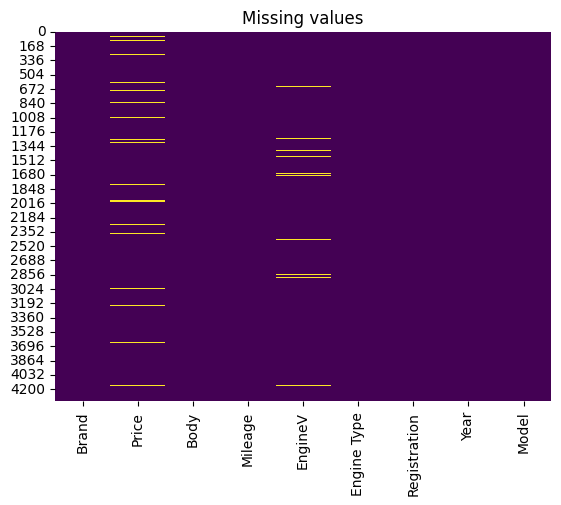

In [17]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.title('Missing values')
plt.show()

In [35]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### We can conclude missing values are more in the price , then in the Engine V columns

#### Approaches to missing values 
1. Fill with mean/median in case of numerical variables
2. Fill missing values with maximum count in case of categorical variables 
3. Check description of data to conclude if to replace missing values with mean or media 

In [22]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### When to replace null data 
1. When the proportion of null data is small,replacing with an appropriate value can help retain the dataset's integrity without significantly impacting the analysis 
2. When the missing data is random distributed (Missing Completely at Random-MCAR),imputation can be an effective strategy 
3. When the variable is important : For key variables, imputing missing values might be preferable to losing important information by removing rows or columns
4. **Replacing with Mean**
    - The mean is useful when the data is symmetrically ditributed and there are no outliers
5. **Replacing with Median**
    - The median is robust to outliers and skewed ditributions
6. **Replacing with Mode**
    - The mode is suitable for categorical data or when the most frequent value is meaningful

7. **When to remove the data**
    - When the proportion of null data is high, more than 30%
    - When the missing data is non-random
    - when the variable is not important 

#### Check the proportion of our missing data 

In [49]:
print(f"{(data.isnull().sum() /len(data)) *100} ")

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64 %


<Axes: >

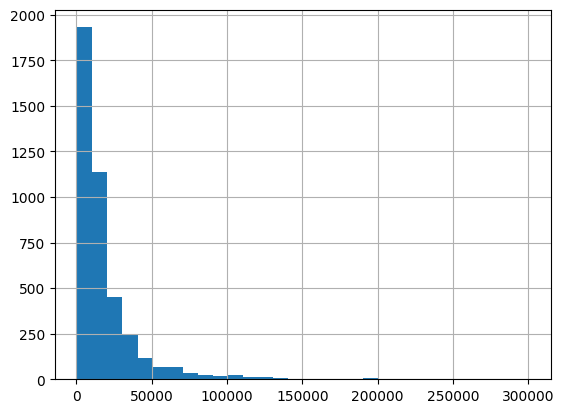

In [40]:
data['Price'].hist(bins=30)

<Axes: ylabel='Density'>

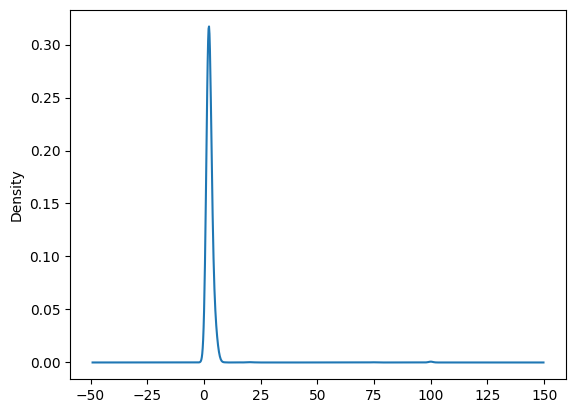

In [42]:
data['EngineV'].plot(kind='kde')

<Axes: ylabel='Density'>

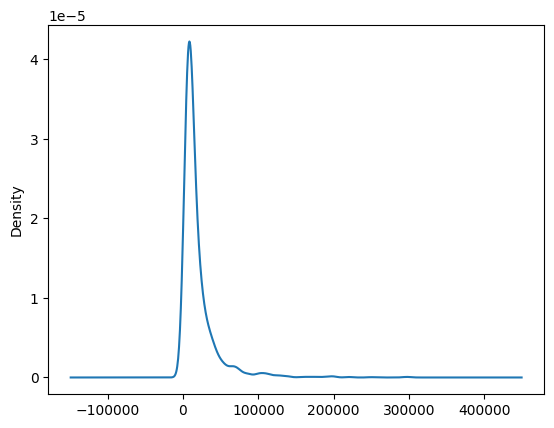

In [41]:
data['Price'].plot(kind='kde')

##### A quantile-quartile plot compares the distribution of your data to a theoretical(normal) distribution. If the data follows a straight line, it is normall distributed. Deviations from the line indicate skewness or other departures from normality

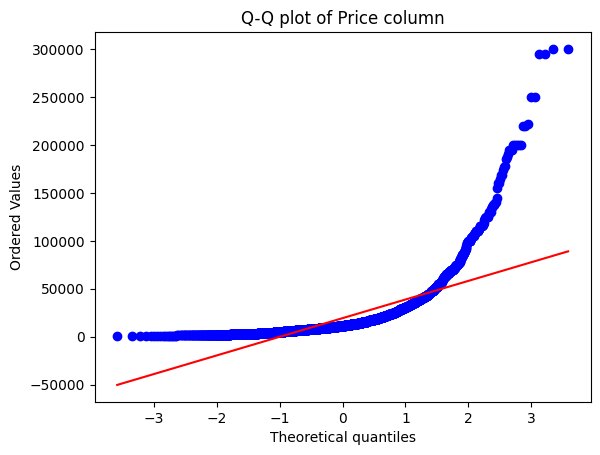

In [44]:
stats.probplot(data['Price'].dropna(),dist="norm",plot=plt)
plt.title("Q-Q plot of Price column")
plt.show()

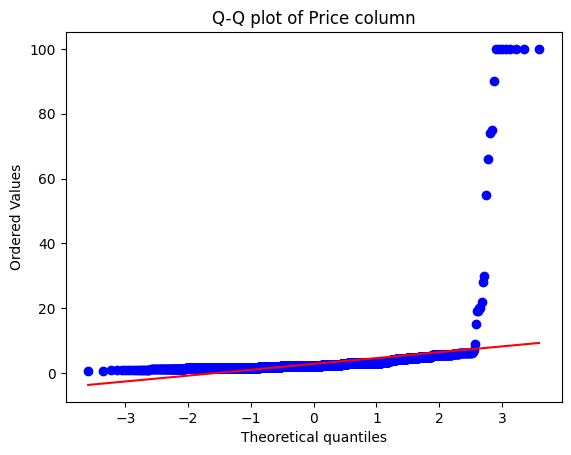

In [46]:
stats.probplot(data['EngineV'].dropna(),dist="norm",plot=plt)
plt.title("Q-Q plot of Price column")
plt.show()

##### Box plot 

<Axes: >

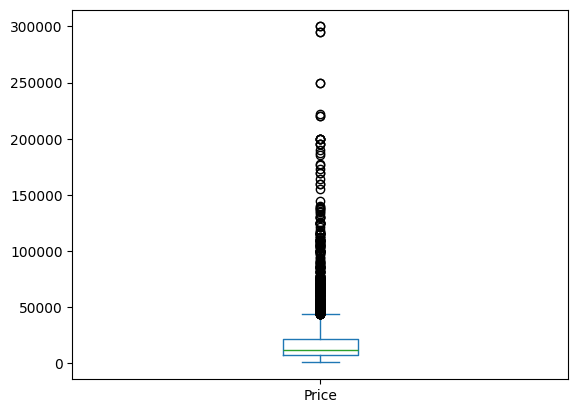

In [48]:
data['Price'].plot(kind='box')

#### There is skewness and then the missing data is not up to 30%

#### Lets replace with median and visualize

#### Visualizing dataset before imputation

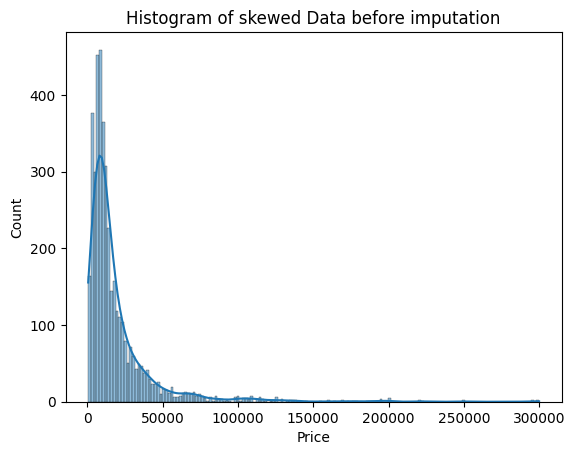

In [50]:
sns.histplot(data['Price'].dropna(),kde=True)
plt.title("Histogram of skewed Data before imputation")
plt.show()

#### Imputing the median

In [60]:
data_new=data.copy()
data_new.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

Text(0.5, 1.0, 'Histogram of skewed data after imputation')

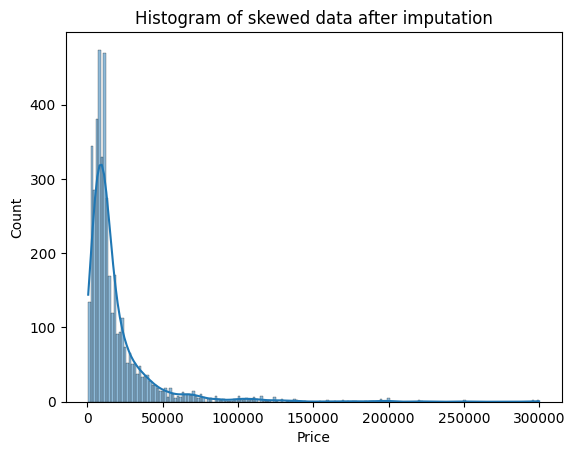

In [63]:
sns.histplot(data_new['Price'],kde=True)
plt.title("Histogram of skewed data after imputation")

#### Summary statistics

In [68]:
print(f"Data description before replacing data \n {data.describe()} \n Data description after replacing null \n {data_new.describe()} ")

Data description before replacing data 
                Price      Mileage      EngineV         Year
count    4345.000000  4345.000000  4345.000000  4345.000000
mean    19105.277551   161.237284     2.770341  2006.550058
std     25120.133334   105.705797     4.979364     6.719097
min       600.000000     0.000000     0.600000  1969.000000
25%      7100.000000    86.000000     1.900000  2003.000000
50%     11500.000000   155.000000     2.200000  2008.000000
75%     20900.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000 
 Data description after replacing null 
                Price      Mileage      EngineV         Year
count    4345.000000  4345.000000  4345.000000  4345.000000
mean    19105.277551   161.237284     2.770341  2006.550058
std     25120.133334   105.705797     4.979364     6.719097
min       600.000000     0.000000     0.600000  1969.000000
25%      7100.000000    86.000000     1.900000  2003.000000
50%     11500.000

In [69]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [70]:
data.memory_usage()

Index             128
Brand           34760
Price           34760
Body            34760
Mileage         34760
EngineV         34760
Engine Type     34760
Registration    34760
Year            34760
Model           34760
dtype: int64

<Axes: xlabel='EngineV', ylabel='Price'>

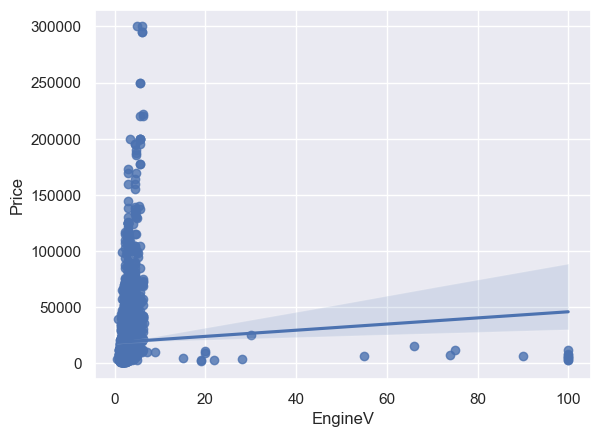

In [71]:
sns.set(style="darkgrid")
sns.regplot(x=data['EngineV'],y=data['Price'])

#### Now the issue of the null data is well addressed 